## Global Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


data_dir = Path('../data/')

artifacts_df = pd.read_json(data_dir.joinpath('Step1_artifacts.json'), orient='index')
studies_df = pd.read_csv(data_dir.joinpath('studies_dataset.csv'), index_col='id').drop(columns='old_id')

tdma_list = ['repayment',
            'monitoring',
            'measurement',
            'identification',
            'communication',
            'prevention',
            'priorization',
            'representation/documentation']

td_types_list = ['code',
                 'design',
                 'architectural',
                 'test',
                 'documentation',
                 'requirements',
                 'build',
                 'infrastructure',
                 'versioning',
                 'satd']

## Step 1 - Studies per year

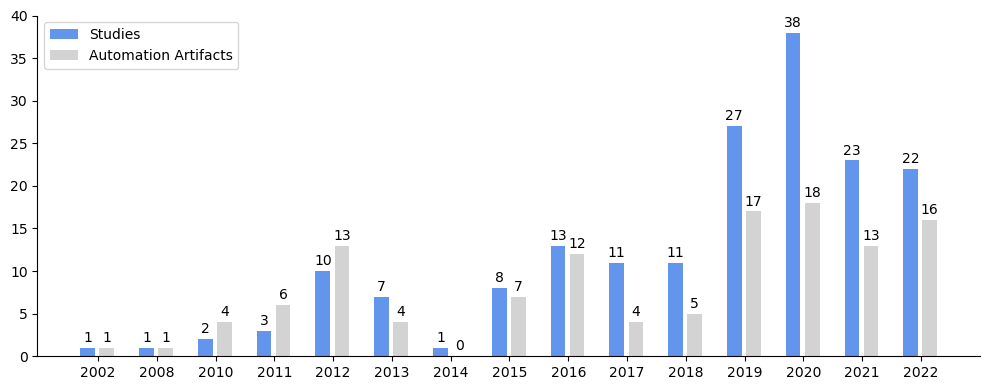

In [178]:
import matplotlib.pyplot as plt
import numpy as np

artifacts_per_year = artifacts_df[['first_citation', 'name']].groupby('first_citation').count().sort_values(by='first_citation')
studies_per_year = studies_df[['year', 'title']].groupby('year').count().sort_values(by='year')

artifacts_years = []
studies_year = []
for i in studies_per_year.index:
    studies_year.append(studies_per_year['title'][i])
    if i in artifacts_per_year.index:
        artifacts_years.append(artifacts_per_year['name'][i])
    else:
        artifacts_years.append(0)

years = [x.replace(',','').replace('.00', '') for x in studies_per_year.index]
values = {
    'Studies': studies_year,
    'Automation Artifacts': artifacts_years
}

colors = {
    'Studies': 'cornflowerblue',
    'Automation Artifacts': 'lightgray'
}

x = np.arange(len(years))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.3

fig, ax = plt.subplots(layout='tight')

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color = colors[attribute])
    ax.bar_label(rects, padding=2)
    multiplier += 1.3

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width, years)
ax.legend(loc='upper left')
ax.set_ylim(0, 40)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.margins(0.05, 0)

plt.rcParams["figure.figsize"] = (10,4)

plt.savefig('../figures/dem-studies-per-year.pdf', bbox_inches='tight')

## Step 2 - Studies per venue type

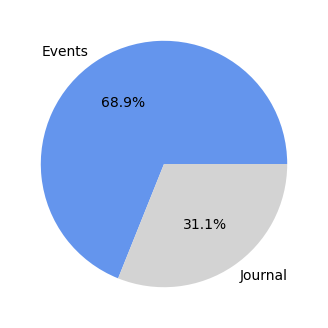

In [176]:
venues = studies_df.loc[:,['venue_type','venue']].groupby('venue_type').count().sort_values(by='venue', ascending=False)
fig, ax = plt.subplots()
ax.pie([venues['venue']['Conference'] + venues['venue']['Workshop'], venues['venue']['Journal']], labels=['Events', 'Journal'], 
       autopct='%1.1f%%', colors = ['cornflowerblue', 'lightgray'])

ax.margins(0.05, 0)

plt.rcParams["figure.figsize"] = (10,4)

plt.savefig('../figures/dem-studies-per-venue.pdf', bbox_inches='tight')

In [180]:
venues

,venue
venue_type,
Conference,109
Journal,55
Workshop,13


## Step 3 - Studies per author type

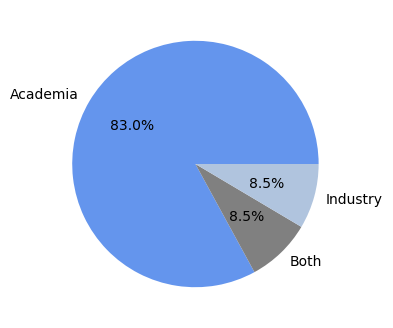

In [179]:
studies_per_author_type = studies_df.loc[:,['author_type','venue']].groupby('author_type').count().sort_values(by='venue', ascending=False)

fig, ax = plt.subplots()

ax.pie(studies_per_author_type['venue'], labels=studies_per_author_type.index, 
       autopct='%1.1f%%'
       , colors = ['cornflowerblue', 'gray','lightsteelblue'])

ax.margins(0.05, 0)

plt.rcParams["figure.figsize"] = (10,4)

plt.savefig('../figures/dem-studies-per-author-type.pdf', bbox_inches='tight')